In [136]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [137]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [138]:
%pip install urllib3 --upgrade 
%pip install requests --upgrade 
%pip install spotipy --upgrade

In [ ]:
# setup
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import numpy as np
import timeit
import pandas as pd
from operator import itemgetter
import time
import datetime as dt
import scipy.stats as stats

os.environ['SPOTIPY_CLIENT_ID'] = '3191e7e8b04e46c1af64f49bcdd020be'
os.environ['SPOTIPY_CLIENT_SECRET'] = '88dc925eff0d4006bb6d0b9b2401ac59'

auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
# User's 5 chosen tracks:
# Toxic, Promiscuous, Sk8er Boi, Run It!, Your Love Is My Drug
# track_uris = ["spotify:track:6I9VzXrHxO9rA9A5euc8Ak", "spotify:track:2gam98EZKrF9XuOkU13ApN", "spotify:track:4omisSlTk6Dsq2iQD7MA07", "spotify:track:7xYnUQigPoIDAMPVK79NEq", "spotify:track:3uoQULcUWfnt6nc6J7Vgai"]
# Limitless, Boneless, Astro Funk, Renegade, Tie Dye Sky
track_uris = ['spotify:track:44ib3nlda2rBy0qmMUelnd', 'spotify:track:5PZI5xTcMq8FsCcEroth7S', 'spotify:track:7wRzUAw0Npu4CalkDIFHJE', 'spotify:track:34VvEULRDeVXiaCRsUebKg', 'spotify:track:2YZSTgWXEyDPUeKop4eiWo']

In [ ]:
# Get audio features for user's chosen tracks from Spotify API
chosen_features = sp.audio_features(track_uris)

In [ ]:
# Get audio features for user's recommended tracks from Spotify API
recommendations_uris = pd.DataFrame(sp.recommendations(seed_tracks=track_uris, limit=100)['tracks'])['uri']
recomendations_features = sp.audio_features(recommendations_uris)

<AxesSubplot:ylabel='Density'>

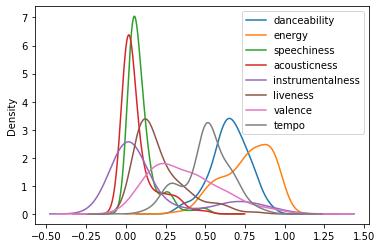

In [ ]:
# Create list of all features favoring 
chosen_features_weight = 1
all_features = pd.DataFrame(chosen_features * chosen_features_weight + recomendations_features)

usable_features = all_features.drop(['key', 'loudness', 'mode', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)
usable_features['tempo'] = (usable_features['tempo'] - 50) / 150

usable_features.plot.kde()

In [ ]:
# why is determinant 0? values too close to zero?
stats.gaussian_kde(usable_features)